# ***Prerequisites***

In [1]:
# # Create the conda environment
# %conda create -n bio_python python=3.7.6

# # Activate the environment
# %conda activate bio_python

# # Install the required packages
# %conda install -n bio_python biopython

# # Verify the installation
# %conda list -n bio_python

# ***Practice UAP 1***

In [2]:
from Bio import SeqIO, pairwise2
from Bio.SeqUtils import molecular_weight, GC
from collections import Counter
from Levenshtein import distance
from matplotlib import pyplot
import seaborn

ID: AB292765.1
Name: AB292765.1
Description: AB292765.1 Vulpes vulpes mitochondrial genes for cytochrome b, tRNA-Thr, tRNA-Pro, D-loop, complete cds, complete and partial sequence, isolate: C14-D18_1
Number of features: 0
Seq('ATGACCAACATTCGAAAGACTCACCCACTAGCTAAAATCGTCAACGACTCATTC...ATC')

1671



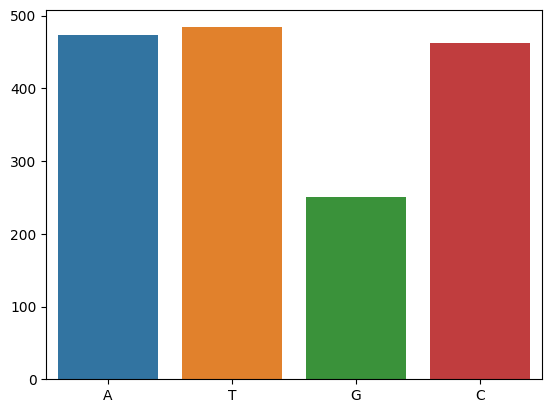

GC content: 42.73%
AT content: 57.27%

Molecular Weight: 511916.0529000028
AUGACCAACAUUCGAAAGACUCACCCACUAGCUAAAAUCGUCAACGACUCAUUCAUCGACCUUCCCGCACCAUCAAAUAUUUCUGCCUGAUGGAACUUCGGGUCCCUGCUGGGUGUAUGCCUUAUUCUACAGAUUGCAACAGGUCUAUUUCUAGCCAUACACUAUACAUCCGACACAGCUACUGCUUUUUCAUCAGUCACUCAUAUCUGCCGAGACGUUAACUAUGGCUGAAUUAUCCGUUACAUACAUGCAAACGGAGCAUCUAUAUUUUUUAUCUGCCUCUUCAUGCACGUAGGACGAGGCCUAUACUAUGGAUCUUAUGUAUUCAUAGAAACAUGAAAUAUCGGAAUUAUCUUAUUGUUCGCAACCAUGGCCACAGCAUUUAUGGGCUACGUUUUACCAUGAGGACAAAUAUCAUUCUGAGGGGCAACCGUAAUUACAAAUCUUCUAUCUGCUAUCCCCUAUAUCGGAACCGAUCUAGUAGAAUGAAUUUGAGGGGGCUUCUCAGUAGACAAAGCAACCCUAACACGAUUCUUUGCAUUCCACUUUAUCCUUCCAUUCAUCAUCGCAGCAUUAGCGAUAGUCCAUCUCUUAUUUCUCCACGAAACAGGAUCCAACAACCCUUCAGGAAUCACAUCCGACUCAGACAAAAUUCCAUUUCACCCCUACUACACAGUUAAAGACAUCCUAGGAGUCUUACUUCUCCUUUCAGUUCUAAUAUCGCUAGUCCUAUUCUCACCAGAUCUUUUAGGAGACCCAGACAAUUACACCCCCGCAAACCCCCUCAGCACUCCCCCACAUAUCAAACCCGAGUGAUAUUUCCUAUUUGCCUAUGCUAUUCUCCGGUCCAUCCCUAAUAAACUAGGAGGAGUCCUAGCCCUAGUGUUCUCAAUCCUAAUCCUAGCACUCAUCCCUCACCUACACA

In [3]:
# 1. Insert sequence from fasta file
record = SeqIO.read("vulpes_vulpes.fasta", "fasta")

# 2. show record from fasta file
print(record, end="\n\n")

# 3. find and display the length of sequence from fasta file
print(len(record.seq), end="\n\n")

# 4. calculate (A,C,G,T) frequence from sequence using chart from matplotlib
frequency = Counter(record.seq)
seaborn.barplot(x=list(frequency.keys()), y=list(frequency.values()))
pyplot.show()

# 5. determine and display GC & AT content percentage for sequence from fasta file
GC_count = GC(record.seq)
AT_count = 100 - GC_count
print(f"GC content: {GC_count:.2f}%")
print(f"AT content: {AT_count:.2f}%", end="\n\n")

# 6. determine and display the molecular weight
weight = float(molecular_weight(record.seq))
print(f"Molecular Weight: {weight}")

# 7. transcribe sequence from fasta file then display
print(record.seq.transcribe(), end="\n\n")

# 8. translate sequence from fasta file then display
print(record.seq.translate(), end="\n\n")

# 9. perform local alignment pairwise between sequence 20 first nucleotides from the sequence we get from fasta file with "ACTGCGTACGACGATCGTAG"
sequence_fasta = record.seq[:20]
target_sequence = "ACTGCGTACGACGATCGTAG"
alignments = pairwise2.align.localxx(sequence_fasta, target_sequence, score_only=True)
print(f"Local Alignment Score: {alignments}", end="\n\n")

# 10. find the levenstein distance between sequence from fasta file with "GATCGATCGATGATACGATA"
sequence_fasta = record.seq
target_sequence = "GATCGATCGATGATACGATA"
levenshtein_distance = distance(sequence_fasta, target_sequence)
print(f"Levenshtein Distance: {levenshtein_distance}")


# ***Practice UAP 2***

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, pairwise2
from Bio.SeqUtils import GC, molecular_weight, nt_search, MeltingTemp as mt
from collections import Counter
from Levenshtein import distance

1206

TTTCTGAAATTTTAGTTTTTTTTTACCCTTGTCCTCTCGTAACCTTCTGAAAAATTTTTACAATAACAAGTGTACTTCCCATGCGAAGACAAACTACCCTTGCGTTTTCTTCGGAAACTCTTTCGGTTTCTCCGTTTGCTTCCCCTCGACTTTTACTTCCCGTCGTCGCAATGGACCGTCCATGACCTCCCTCTACTTCTCTTTCTCTACGACTTCTTCTAGTAACTTCGGGTTGTCCTTAGTATGTTAGCTAGTTTTCCGTCTCCGCCCTCTCCTTCTAGACCGCCGTCTCCTTCTCCTCCGGCTTCCCCTTCTCCACCGTCTCTAGTTCCGTCCTGAGTCAAGGTCCCCTTCTTTTGCTTTAAACTGTCACTATTACTCCTACTGCTGCTCCCACTCCTTCGTGGACGTCGGGGTTTCTCTCTCGAACTTCTGCGTCTGCCAGGAGGTCGCTTTCAAAAGTTTTGACTTTTGCCGAGCATTACACCTCTGCTGCAGGTCTCAAAAAAGAAATCGTTTGTCTAAATAATGTTTGCCACTTTTTACGTCTCCGTTGAATTTCGGGTAAGGTCATTTTTTGTAAGTCCGAAACCTCTTAGCCTCTTTCAGGTGGACCTACAGTTGGACTTCTTTGTAAACCTTTTGAACCTCAGTCAAAAGTCGAAAAATTCGGGAAATAAAAAACGGAGAATAAACATACAAAAGAAAAGAGTTGCTTTTTACAAAATTAAAATCGTGTTAGTTGCATTTGGACTGCCAGATTAAAGTAGACTCACTATCGATCTTAATCACACGGTAACCAACAAACAAAAGTAAAACATCTAAATGATGTAACTCACTACGCTTACACAGTACTTAAAGCAAATTTCAAACGTATAAGGTCATCGTTTAATTTACAAATATTTTTTATTTCAAAACAAAACCTAGACTTCACGTACTATAACGTATAACAATTACTTGAATGTCTGAAGAAGAACACCTTCGCCATCCTTCG

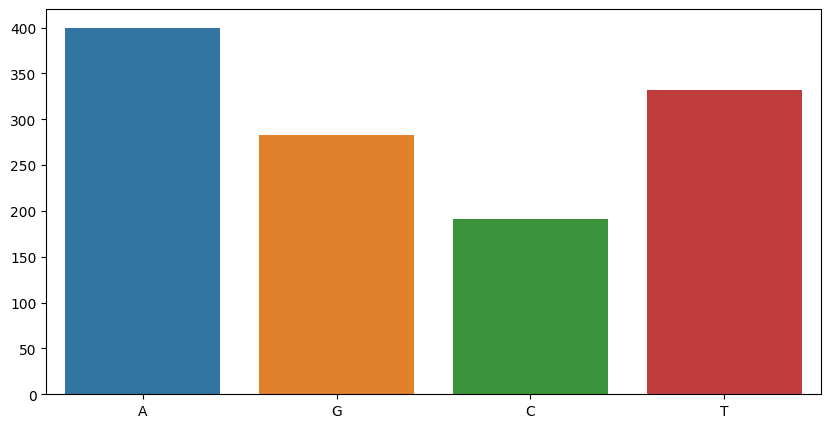

Melting Point (Tm_Wallace): 3360.00°C
Melting Point (Tm_GC)     : 75.27°C
Melting Point (Tm_NN)     : 78.14°C

Molecular Weight: 374691.75 g/mol

Global Alignment Score: 156.0

Global Alignment Score: 78.0

Global Alignment Score: -38.40000000000093

Hamming Distance: 875

Levenshtein Distance: 647



In [5]:
# 1. Read the sequence from a.fasta and store it as SeqA
SeqA = SeqIO.read("poeciliopsis_prolifica.fasta", "fasta").seq

# 2. Show the length of SeqA
print(len(SeqA), end='\n\n')

# 3. Show the complement of SeqA
print(SeqA.complement(), end='\n\n')

# 4. Show the transcribe of SeqA
print(SeqA.transcribe(), end='\n\n')

# 5. Show the translate of SeqA
print(SeqA.translate(), end='\n\n')

# 6. Show the 5th until 40th nucleotide from SeqA
print(SeqA[4:40], end='\n\n')

# 7. Search all the occurence of "AATC" from SeqA
print(nt_search(str(SeqA), "AATC"), end='\n\n')

# 8. Show the GC content from SeqA
print(GC(SeqA), end='\n\n')

# 9. Show the AT content from SeqA
print(100 - GC(SeqA), end='\n\n')

# 10. Show the plot of frequency of each nucleotide from SeqA
frequency = Counter(SeqA)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(frequency.keys()), y=list(frequency.values()))
plt.show()

# 11. Show the melting point of SeqA using Tm_Wallace, Tm_GC, and Tm_nn
print(f"Melting Point (Tm_Wallace): {mt.Tm_Wallace(SeqA):.2f}°C")
print(f"Melting Point (Tm_GC)     : {mt.Tm_GC(SeqA):.2f}°C")
print(f"Melting Point (Tm_NN)     : {mt.Tm_NN(SeqA):.2f}°C", end='\n\n')

# 12. Show the molecular weight of SeqA
weight = molecular_weight(SeqA)
print(f"Molecular Weight: {weight:.2f} g/mol", end='\n\n')

# 13. Perform global alignment between SeqA and given sequence
sequence = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
alignment = pairwise2.align.globalxx(SeqA, sequence, score_only=True) # no parameter for match and mismatch
print(f"Global Alignment Score: {alignment}", end='\n\n')
alignment = pairwise2.align.globalmx(SeqA, sequence, 0.5, -1, score_only=True) # with parameter for match (0.5) and mismatch (-1)
print(f"Global Alignment Score: {alignment}", end='\n\n')
alignment = pairwise2.align.globalms(SeqA, sequence, 0.5, -1, -0.3, -0.1, score_only=True) # with parameter for match (0.5), mismatch (-1), open gap (-0.3), and extend gap (-0.1)
print(f"Global Alignment Score: {alignment}", end='\n\n')

# 14. Find the Hamming distance between SeqA and given sequence
sequence = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
hamming_distance = sum(1 for a, b in zip(SeqA, sequence) if a != b)
print(f"Hamming Distance: {hamming_distance}", end='\n\n')

# 15. Find the Levenshtein distance between SeqA and given sequence
sequence = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
levenshtein_distance = distance(SeqA, sequence)
print(f"Levenshtein Distance: {levenshtein_distance}", end='\n\n')